## Notes/Observations

### Accuracy
- Test Accuracy of 87.79% was obtained
- No of parameters is 15M

### What we can learn from VGG?
- Smaller filter sizes of (3x3) are used.
- This is because two consecutive (3x3) filters have the same receptive field as a (5x5) filter while three consecutive (3x3) filters have the same receptive filed as a (7x7) filter.
- This is more advantageous owing to an additional non-linearity layers while using fewer parameters.
- Also VGG-16 is a much deeper model than AlexNet (61M) with 138M parameters and the way the conv filters are used is very regular. The number of filters are doubled after every maxpool.
- This sort of regular architecture can be used as a guideline while building baseline models for your datasets.

### Architecture
- This is not the complete VGG-16 architecture. It is version of VGG_16 adapted to the CIFAR-10 dataset.
- It has 15M while the original VGG-16 has 138M parameters.
- The Conv layers are isentical to the original VGG-16 architecture and changes are only made in the dense layes.
- Upscaling the image and using a larger model will probably boost performance even more but since VGG has 5 maxpools the model can be used without resizing CIFAR's 32*32 images. So no resizing was done.

### Training
- Some simple augmentation was performed with the Keras ImageDataGenerator() function given by-
<br>datagen = ImageDataGenerator(
    <br>rotation_range=20,
    <br>width_shift_range=0.2,
    <br>height_shift_range=0.2,
    <br>horizontal_flip=True)

## Import the required libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)

2.4.3


## Load and explore the data

In [ ]:
(x_train, y_train),(x_test, y_test)= keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (50000, 32, 32, 3) 	dtype: uint8
y_train: (50000, 1) 		dtype: uint8
x_test: (10000, 32, 32, 3) 	dtype: uint8
y_test: (10000, 1) 		dtype: uint8


## Normalize the data

In [ ]:
mean = np.mean(x_train)
print(mean)

120.70756512369792


In [ ]:
std = np.std(x_train)
print(std)

64.1500758911213


In [ ]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [ ]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

## Reshape input, add one hot encode labels and split between train and val

In [ ]:
from keras.utils import to_categorical
y_train =  to_categorical(y_train)
y_test  =  to_categorical(y_test)

In [ ]:
def simultaneous_shuffle(images, labels):
    np.random.seed(0)
    shuffle_ind = np.arange(images.shape[0])
    np.random.shuffle(shuffle_ind)
    images = images[shuffle_ind]
    labels = labels[shuffle_ind]
    return images, labels

In [ ]:
train_percent = 0.8
n_train = int(x_train.shape[0]*train_percent)
x_train, y_train = simultaneous_shuffle(x_train, y_train)
x_val, y_val = x_train[n_train:], y_train[n_train:]
x_train, y_train = x_train[:n_train], y_train[:n_train]

In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_val:', x_val.shape, '\tdtype:', x_val.dtype)
print('y_val:', y_val.shape, '\t\tdtype:', y_val.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (40000, 32, 32, 3) 	dtype: float32
y_train: (40000, 10) 		dtype: float32
x_val: (10000, 32, 32, 3) 	dtype: float32
y_val: (10000, 10) 		dtype: float32
x_test: (10000, 32, 32, 3) 	dtype: float32
y_test: (10000, 10) 		dtype: float32


## Build the VGG-16 model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

## Compile and Train the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Saved Models')

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('CIFAR_10_VGG_16.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

In [ ]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.0005)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), validation_data=(x_val, y_val), epochs=65, steps_per_epoch=len(x_train) // 128, callbacks=mc)

Epoch 1/65
312/312 [==============================] - 28s 81ms/step - loss: 2.2073 - accuracy: 0.1334 - val_loss: 1.8986 - val_accuracy: 0.2210

Epoch 00001: val_loss improved from inf to 1.89856, saving model to CIFAR_10_VGG_16.h5
Epoch 2/65
312/312 [==============================] - 24s 78ms/step - loss: 1.8724 - accuracy: 0.2365 - val_loss: 1.7393 - val_accuracy: 0.3427

Epoch 00002: val_loss improved from 1.89856 to 1.73934, saving model to CIFAR_10_VGG_16.h5
Epoch 3/65
312/312 [==============================] - 24s 78ms/step - loss: 1.6448 - accuracy: 0.3667 - val_loss: 1.5503 - val_accuracy: 0.4166

Epoch 00003: val_loss improved from 1.73934 to 1.55033, saving model to CIFAR_10_VGG_16.h5
Epoch 4/65
312/312 [==============================] - 24s 78ms/step - loss: 1.4595 - accuracy: 0.4392 - val_loss: 1.7537 - val_accuracy: 0.4379

Epoch 00004: val_loss did not improve from 1.55033
Epoch 5/65
312/312 [==============================] - 24s 77ms/step - loss: 1.3329 - accuracy: 0.506

## Test the model

In [ ]:
# Loading model with the lowest validation loss
model = keras.models.load_model("CIFAR_10_VGG_16.h5")

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Set')
print('Loss:', test_loss)
print('Accuracy', test_acc)

313/313 [==============================] - 10s 8ms/step - loss: 0.4476 - accuracy: 0.8779
Test Set
Loss: 0.4476107954978943
Accuracy 0.8779000043869019


## Prediction

Below is the information on Fashion MNIST Class Labels.

In [ ]:
class_labels = dict([(0, 'Airplane'), (1, 'Automobile'), (2, 'Bird'),  (3, 'Cat'), (4, 'Deer'), (5, 'Dog'), (6, 'Frog'), (7, 'Horse'), (8, 'Ship'), (9, 'Truck')])
print('Label', "\t", 'Class\n')
for x in class_labels:
  print(x, "\t", class_labels[x])

Label 	 Class

0 	 Airplane
1 	 Automobile
2 	 Bird
3 	 Cat
4 	 Deer
5 	 Dog
6 	 Frog
7 	 Horse
8 	 Ship
9 	 Truck


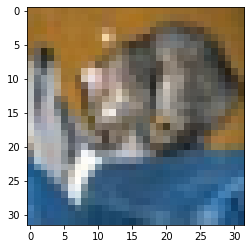

In [ ]:
# Set the index of the image in test set for which the output must be predicted
# Valid ind values range is: 0, 1, 2, ... 9999
ind = 0
plt.imshow((x_test[ind]*std + mean).astype(np.uint8))

In [ ]:
pred = model.predict(x_test[ind].reshape(1,32,32,3))
print('The pridicted probability different classes is')
print(pred)
print('The predicted class is', pred.argmax(), class_labels[pred.argmax()])
print('The actual class is', y_test[ind].argmax(), class_labels[y_test[ind].argmax()])

The pridicted probability different classes is
[[9.0825370e-06 2.4723107e-07 8.7871478e-05 9.9324483e-01 4.9107271e-05
  6.3179769e-03 1.7028517e-04 6.1083527e-05 2.6158394e-05 3.3369310e-05]]
The predicted class is 3 Cat
The actual class is 3 Cat


## Loss and Accuracy Curves

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
x_axis = range(1, len(train_loss)+1)

Text(0.5, 1.0, 'Loss Curve')

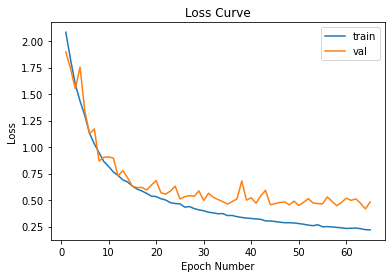

In [ ]:
plt.plot(x_axis, train_loss, label='train')
plt.plot(x_axis, val_loss, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

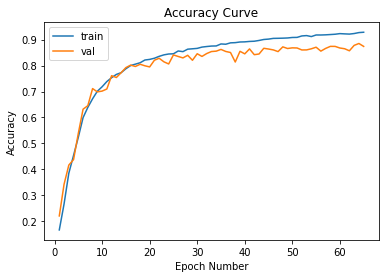

In [ ]:
plt.plot(x_axis, train_acc, label='train')
plt.plot(x_axis, val_acc, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

## Additional Evaluation Metrics
### (Precision, Recall, Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.91      0.89      1000
     Class 1       0.94      0.95      0.94      1000
     Class 2       0.85      0.84      0.85      1000
     Class 3       0.80      0.70      0.74      1000
     Class 4       0.88      0.88      0.88      1000
     Class 5       0.82      0.82      0.82      1000
     Class 6       0.89      0.91      0.90      1000
     Class 7       0.87      0.93      0.90      1000
     Class 8       0.94      0.90      0.92      1000
     Class 9       0.90      0.94      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
cnf_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(cnf_matrix)

[[910   9  23   7   1   0   3  10  23  14]
 [  5 948   2   0   0   0   3   0   4  38]
 [ 23   1 843  23  26  16  32  23   5   8]
 [ 10   2  48 697  30 117  38  36   9  13]
 [  8   0  23  28 875  16  20  27   2   1]
 [  2   2  30  76  19 825   9  31   0   6]
 [  7   1  15  29  20   6 911   7   2   2]
 [  8   2   7   7  19  22   2 928   2   3]
 [ 46  15   2   7   2   1   2   2 903  20]
 [ 15  30   2   1   1   0   2   1   9 939]]
